Task: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

Step-1: Loading the dataset into the environment

In [1]:
import pandas as pd
data=pd.read_csv("dataset.csv")

Inspecting the data

In [2]:
print(data.shape)  # gives info about  no.of rows and columns present in the data
print(data.dtypes)  # gives the info about datatypes of all columns
print(data.head())  # first 10 rows

(1309, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch           

In [3]:
# changing the datatype of 'Survived' into factor because it describes about the survival status

data['Survived']=pd.Categorical(data['Survived'].replace({0: 'Not Survived', 1:'Survived'}))

#cross check
print(data['Survived'].dtype)

category


Step-2: Data Cleaning

In [4]:
# checking for missing values
print(data.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [5]:
# got to know that there are some missing values in the columns 'Age', 'Fare', 'Cabin' and 'Embarked'

# handling missing values
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Fare']=data['Fare'].fillna(data['Fare'].mean())

# filling the missing values in Cabin and Embarked columns with the previous row's value
data['Cabin'] = data['Cabin'].fillna(method='ffill').fillna(method='bfill')
data['Embarked']=data['Embarked'].fillna(method='ffill').fillna(method='bfill')

# Dropping the unnecessary columns in the data which doesn't contribute to our analysis
data.drop(['Ticket'],axis=1,inplace=True)

C:\Users\saisa\AppData\Local\Temp\ipykernel_13760\2743646908.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Cabin'] = data['Cabin'].fillna(method='ffill').fillna(method='bfill')
C:\Users\saisa\AppData\Local\Temp\ipykernel_13760\2743646908.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Embarked']=data['Embarked'].fillna(method='ffill').fillna(method='bfill')


In [6]:
# cross checking if any column is left with missing value
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Step-3: Descriptive Statistics

In [7]:
# Summary statistics for numerical columns
print("Numerical Statistics")
print(data.describe())

# Summary statistics for categorical columns
print("Categorical Statistics")
print(data['Sex'].value_counts())
print(data['Survived'].value_counts())

Numerical Statistics
       PassengerId       Pclass          Age        SibSp        Parch  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean    655.000000     2.294882    29.881138     0.498854     0.385027   
std     378.020061     0.837836    12.883193     1.041658     0.865560   
min       1.000000     1.000000     0.170000     0.000000     0.000000   
25%     328.000000     2.000000    22.000000     0.000000     0.000000   
50%     655.000000     3.000000    29.881138     0.000000     0.000000   
75%     982.000000     3.000000    35.000000     1.000000     0.000000   
max    1309.000000     3.000000    80.000000     8.000000     9.000000   

              Fare  
count  1309.000000  
mean     33.295479  
std      51.738879  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200  
Categorical Statistics
Sex
male      843
female    466
Name: count, dtype: int64
Survived
Not Survived    815
Survived     

Step-4: Exploratory Data Analysis (EDA)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

1. Univariate Analysis

a. Plotting the distribution of age

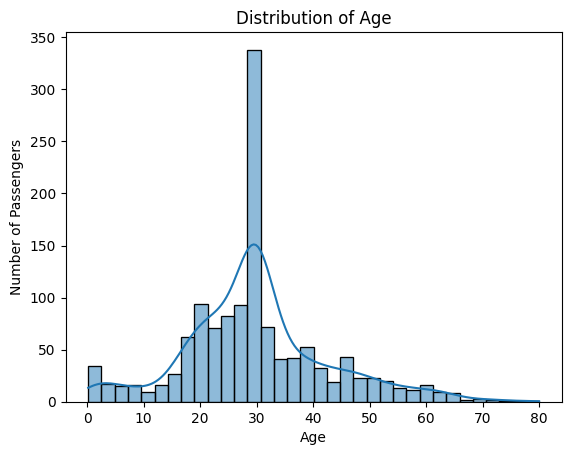

In [9]:
sns.histplot(data['Age'],kde=True)
plt.title('Distribution of Age')
plt.ylabel('Number of Passengers')
plt.show()

b. Pie chart for categorical variable 'Sex'

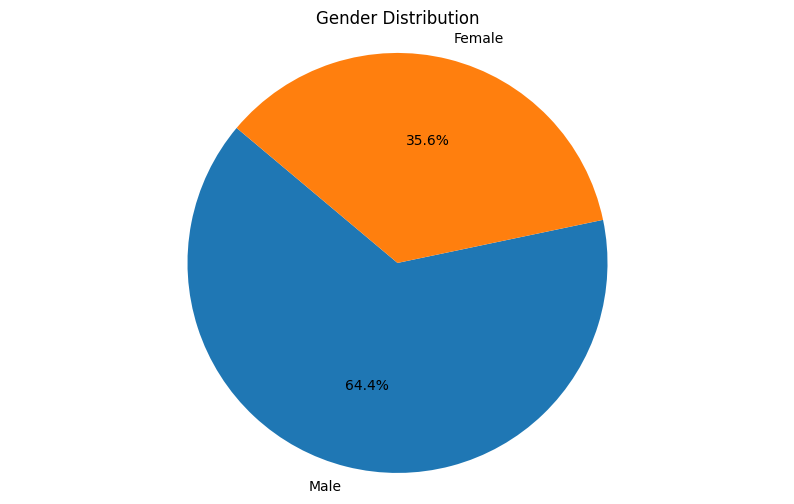

In [10]:
gender_counts=data['Sex'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(gender_counts,labels=['Male','Female'],autopct='%1.1f%%',startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

2. Bivariate Analysis - Relationships between variables

Survival Distribution based on Gender

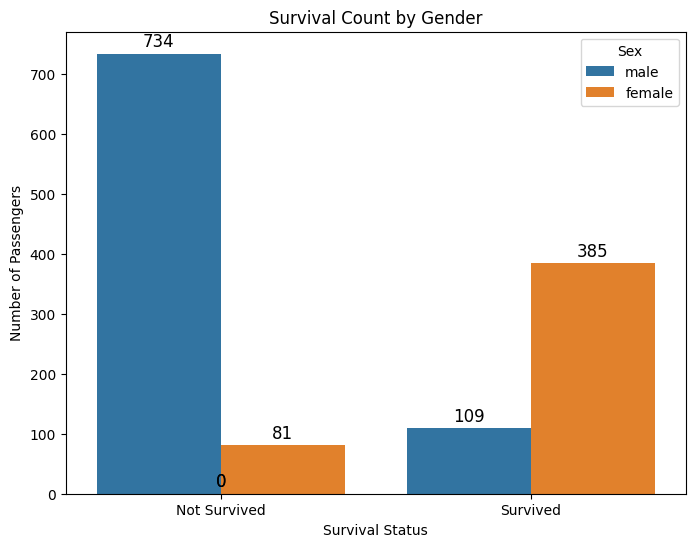

In [11]:
# Countplot of survival based on gender
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Count by Gender')

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
    plt.xlabel('Survival Status')
    plt.ylabel('Number of Passengers')

plt.show()


c. Multivariate Analysis

Survival rate by class and gender

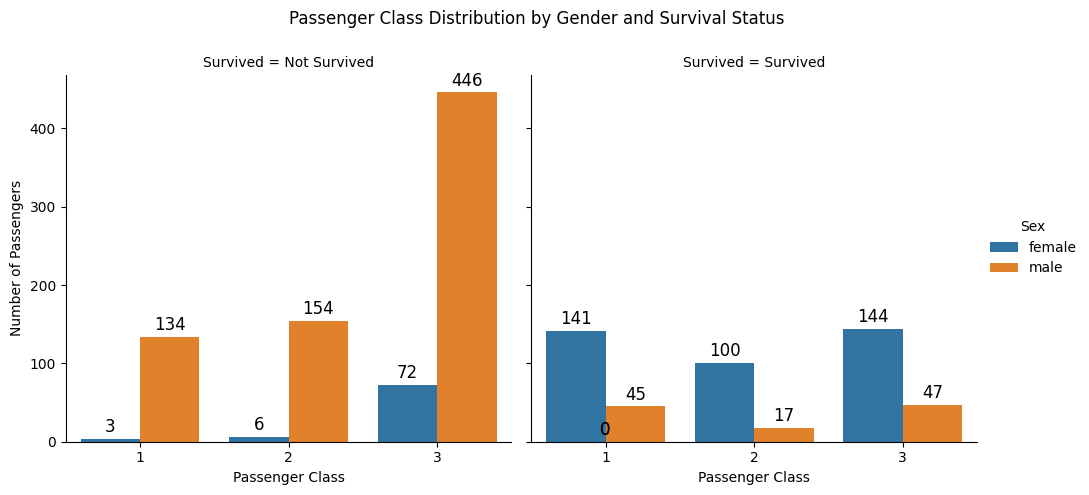

In [12]:
# Creating a catplot
g = sns.catplot(x='Pclass', hue='Sex', col='Survived', data=data, kind='count')

# Set x-axis and y-axis labels for each subplot
for ax in g.axes.flat:
    ax.set_xlabel('Passenger Class')
    ax.set_ylabel('Number of Passengers')

    # Add count labels on top of the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Adjust the layout to make room for the titles
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Passenger Class Distribution by Gender and Survival Status')  # Main title for the entire plot
plt.show()
